In [1]:
#!pip uninstall scipy -y
#!pip install scipy
#!pip install --force-reinstall --no-deps scipy==1.13.1

In [2]:
import pandas as pd
import numpy as np

import os
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from Helper.data_preprocess import prepare_data

In [3]:
path_data = 'Dataset/laptop_raw_data.csv'
df = pd.read_csv(path_data)
print(f'Before Dataset preprocessing \n\n{df}')

Before Dataset preprocessing 

      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Displ

In [4]:
X,y = prepare_data(path_data)
print(f'After Dataset preprocessing \n\n')
#data_df['text']
X


After Dataset preprocessing 




,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Yes,Intel Core i7,4,128,0,Intel,Yes,Windows,1.80
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Yes,Intel Core i7,16,512,0,Intel,Yes,Windows,1.30
1300,Lenovo,Notebook,14.0,1366x768,No,Other Intel Processor,2,0,0,Intel,No,Windows,1.50
1301,HP,Notebook,15.6,1366x768,No,Intel Core i7,6,0,1000,AMD,No,Windows,2.19


In [5]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: price, Length: 1303, dtype: float64

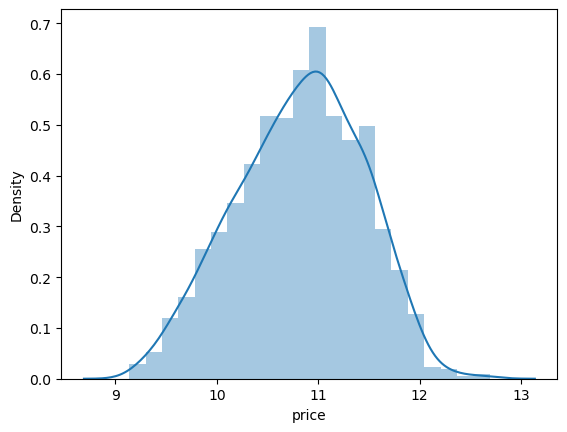

In [6]:
import Helper.ploting_data as pt
dist_plotted = pt.dist_plot(y)
plt.show()

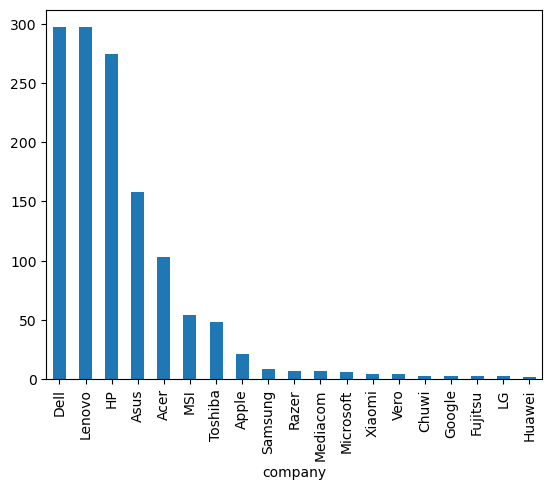

In [7]:
batr = pt.bar_plot(X)
plt.show()

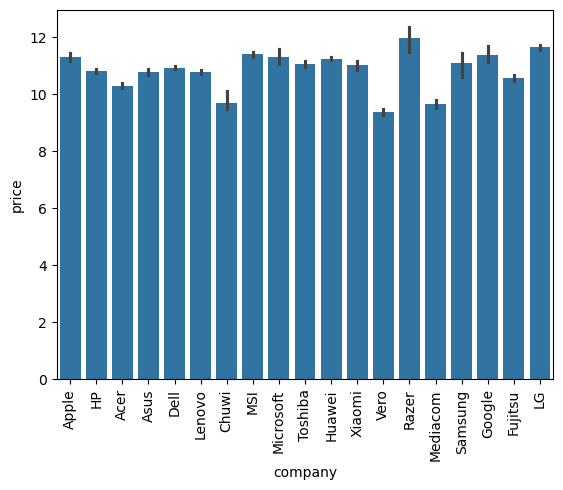

In [8]:
pt.bar_plot_2(X,y)
plt.show()

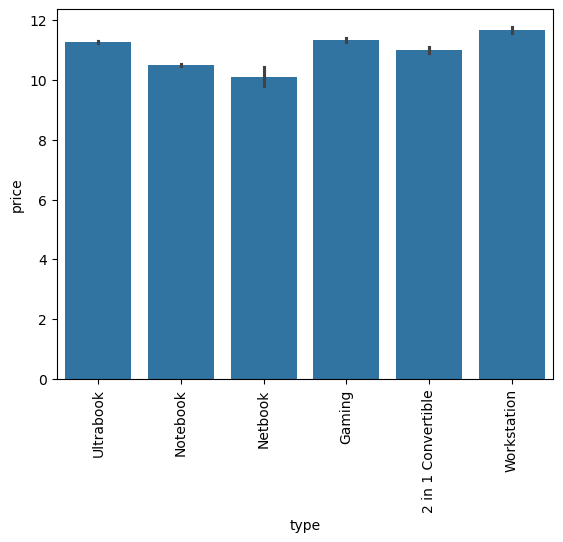

In [9]:
pt.bar_plot_3(X,y)
plt.show()

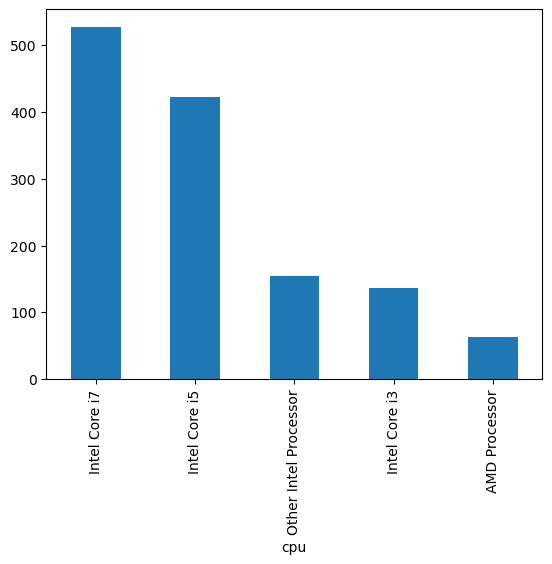

In [10]:
pt.bar_plot_4(X)
plt.show()

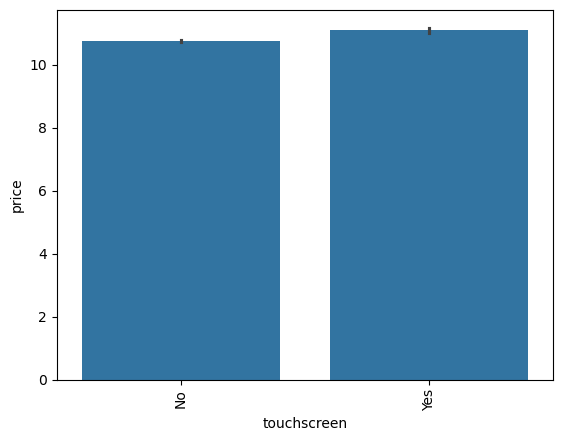

In [11]:
pt.bar_plot_5(X,y)
plt.show()

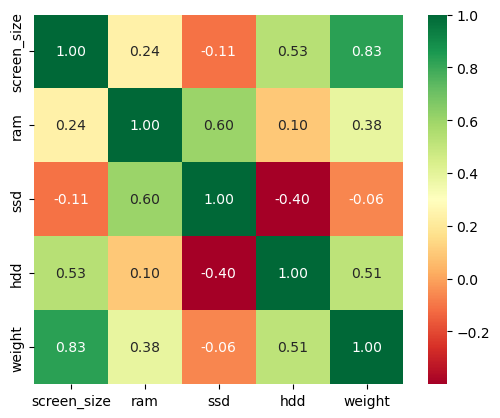

In [12]:
pt.heatmap_plot(X)
plt.show()

In [13]:
X

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Yes,Intel Core i7,4,128,0,Intel,Yes,Windows,1.80
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Yes,Intel Core i7,16,512,0,Intel,Yes,Windows,1.30
1300,Lenovo,Notebook,14.0,1366x768,No,Other Intel Processor,2,0,0,Intel,No,Windows,1.50
1301,HP,Notebook,15.6,1366x768,No,Intel Core i7,6,0,1000,AMD,No,Windows,2.19


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1107, 13), (196, 13), (1107,), (196,))

In [15]:
import Helper.model_training as mt

## LinearRegression model

In [16]:
predicted = mt.linear_reg(X_train,X_test,y_train,y_test)

Score : 82.44 %


In [17]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.908761132963021
R2 Score:0.8244
MAE:0.1971
MSE:0.2546


## Lasso Regression model

In [18]:
predicted= mt.Lasso_reg(X_train,X_test,y_train,y_test)

Score : 52.34 %


In [19]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.7291107705693305
R2 Score:0.5234
MAE:0.3319
MSE:0.4195


## Ridge Regression model

In [20]:
predicted =  mt.Ridge_reg(X_train,X_test,y_train,y_test)


Score : 81.03 %


In [21]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9022992418772922
R2 Score:0.8103
MAE:0.2012
MSE:0.2646


## ElasticNet model

In [22]:
predicted = mt.ElasticNet_model(X_train,X_test,y_train,y_test)

Score : 52.00 %


In [23]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.7285829351313297
R2 Score:0.5200
MAE:0.3333
MSE:0.4209


## DecisionTreeRegressor model

In [24]:
predicted = mt.DecisionTreeRegressor_model(X_train,X_test,y_train,y_test)

Score : 51.99 %


In [25]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.7350524073638701
R2 Score:0.5199
MAE:0.2856
MSE:0.4210


## AdaBoostRegressor model

In [26]:
predicted = mt.AdaBoostRegressor_model(X_train,X_test,y_train,y_test)

Score : 71.33 %


In [27]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.8467892756106066
R2 Score:0.7133
MAE:0.2495
MSE:0.3253


## GradientBoost model

In [28]:
predicted = mt.GradientBoost_model(X_train,X_test,y_train,y_test)

Score : 84.32 %


In [29]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9243119420329269
R2 Score:0.8432
MAE:0.1838
MSE:0.2405


## XGBRegressor_model

In [30]:
predicted = mt.XGBRegressor_model(X_train,X_test,y_train,y_test)

Score : 88.30 %


In [31]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9397269763303383
R2 Score:0.8830
MAE:0.1458
MSE:0.2078


## LGBMRegressor_model

In [32]:
predicted = mt.LGBMRegressor_model(X_train,X_test,y_train,y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 1107, number of used features: 31
[LightGBM] [Info] Start training from score 10.817893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [33]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9380553652926067
R2 Score:0.8794
MAE:0.1473
MSE:0.2110


## CatBoostRegressor_model

In [34]:
predicted = mt.CatBoostRegressor_model(X_train,X_test,y_train,y_test)


Score : 86.66 %


In [35]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9313110982446643
R2 Score:0.8666
MAE:0.1511
MSE:0.2219


## RandomForest_model

In [36]:
predicted = mt.RandomForest_model(X_train,X_test,y_train,y_test)


Score : 83.83 %


In [37]:
eval = mt.evaluation(y_test, predicted)

Pearson Correlation Coefficient: 0.9210504443850598
R2 Score:0.8383
MAE:0.1781
MSE:0.2443
